# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import requests
import os
import numpy as np
import json
import time
import workspace_utils
from workspace_utils import active_session
import tweepy
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install --upgrade tweepy==4.6.0

# !pip install certifi --upgrade

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Downloading and Reading twitter_archive_enhanced.csv
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Checking rows/columns of archive df
archive.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#Using Requests Library to download image_predictions.tsv

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
prediction = pd.read_csv('image_predictions.tsv', sep='\t')
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
#Checking rows/columns of prediction df
prediction.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#Twitter API passcodes
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
bearer_token = 'HIDDEN'


In [7]:
#Code works but have commented it out so that it doesn't run every time

#Extracting info from Twitter API
# client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

# tweet_fields = ['created_at', 'id', 'public_metrics', 'source', 'text']

# with active_session():
#     tweet_info = []
#     for ind, tweet_id in enumerate(archive.tweet_id):
#         tweet_data = {}
#         tweet_data['tweet_id'] = tweet_id
#         temp = client.get_tweet(id=tweet_id, tweet_fields=tweet_fields)
#         if temp.data:
#             if temp.data.get('public_metrics'):
#                 for key, value in temp.data['public_metrics'].items():
#                     tweet_data[key] = value
#         tweet_info.append(tweet_data)
        
        

In [8]:
#Only after running above code, comment out if not needed

#Checking length of tweet_info
#print(len(tweet_info))

In [9]:
#Only after above code, comment out if not needed

#Writing Twitter data to txt File
# with open('tweet_json.txt', 'w') as outfile:
#     for tweet in tweet_info:
#         json.dump(tweet, outfile)
#         outfile.write('\n')

In [10]:
#Writing to DataFrame
tweet_df = pd.read_json('tweet_json.txt', lines=True)

In [11]:
#Viewing tweet_df
tweet_df.head()

,like_count,quote_count,reply_count,retweet_count,tweet_id
0,33412.0,219.0,138.0,6943.0,892420643555336193
1,28968.0,274.0,170.0,5244.0,892177421306343426
2,21788.0,145.0,110.0,3456.0,891815181378084864
3,36460.0,286.0,141.0,7161.0,891689557279858688
4,34895.0,296.0,193.0,7685.0,891327558926688256


In [12]:
#Checking tweet_df rows/columns
tweet_df.shape

(2356, 5)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.


#### Assessing archive df

In [13]:
# Visually assessing sample of archive df
# Noting lots of null values, incorrect values in 'name', 
# and columns ('doggo', 'floofer', 'pupper', 'puppo') can be combined in one col
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
296,837366284874571778,NaN,NaN,2017-03-02 18:17:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She has a portrait of herself on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837366284...,13,10,Lucy,None,None,None,None
1633,684241637099323392,NaN,NaN,2016-01-05 05:14:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Obi. He got camera shy. 12/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684241637...,12,10,Obi,None,None,None,None
1883,674805413498527744,NaN,NaN,2015-12-10 04:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your entire life is crumbling before you ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674805413...,10,10,None,None,None,None,None
1766,678399652199309312,NaN,NaN,2015-12-20 02:20:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678399652...,12,10,None,None,None,None,None
1798,677228873407442944,NaN,NaN,2015-12-16 20:48:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chuq. He just wants to fit in. 11...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677228873...,11,10,Chuq,None,None,None,None
1325,706166467411222528,NaN,NaN,2016-03-05 17:16:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He's a shy pup. Doesn't bark m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706166467...,7,10,Dexter,None,None,None,None
379,827653905312006145,NaN,NaN,2017-02-03 23:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Boots. She doesn't know what to do wit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827653905...,12,10,Boots,None,None,None,None
1974,673148804208660480,NaN,NaN,2015-12-05 14:35:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fletcher. He's had a ruff night. No mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673148804...,8,10,Fletcher,None,None,pupper,None
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I usually only share these on F...,8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
1645,683849932751646720,NaN,NaN,2016-01-04 03:18:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He's not the brightest dog. Ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683849932...,5,10,Jiminy,None,None,None,None


In [14]:
# Programmatically assessing archive df
# tweet_id datatype is int - should be object
# Verifying lots of null values
# timestamp should be datatype datetime instead of object
# Other columns not necessary for analysis
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
#Checking for duplicates based on tweet_id
archive.tweet_id.duplicated().sum()

0

In [16]:
#Checking for duplicates based on text
archive.text.duplicated().sum()

0

In [17]:
#Checking for retweets 
archive.retweeted_status_id.notnull().sum()

181

In [18]:
# Looking at incorrect name values
archive.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Lucy            11
Oliver          11
Lola            10
Penny           10
Tucker          10
Winston          9
Bo               9
the              8
Sadie            8
Toby             7
an               7
Buddy            7
Daisy            7
Bailey           7
Jack             6
Rusty            6
Bella            6
Oscar            6
Jax              6
Scout            6
Milo             6
Leo              6
Koda             6
Stanley          6
Dave             6
Finn             5
              ... 
Willie           1
Banditt          1
Rorie            1
General          1
Rueben           1
Eleanor          1
Duddles          1
Izzy             1
Devón            1
Ralpher          1
Snicku           1
this             1
Shelby           1
Fabio            1
Nimbus           1
Moofasa          1
Yoda             1
Barclay          1
Darby            1
Wiggles          1
Crimson          1
Bluebert    

In [19]:
# Noting values outside of what is expected
# rating_denominator should have value of 10, noting numbers (x < 10 < x)
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
# Programmatically assessing values in rating_demoninator
archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [21]:
archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [22]:
#increasing display column width to be able to visually assess text
pd.set_option('display.max_colwidth', -1)

In [23]:
# Visually assessing sample text
archive.text.sample(50)

211     RT @dog_rates: This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao                                                
840     This is Rupert. You betrayed him with bath time but he forgives you. Cuddly af 13/10 https://t.co/IEARC2sRzC                                                       
1965    This is Gerald. He's a fluffy lil yellow pup. Always looks like his favorite team just lost on a hail mary. 7/10 https://t.co/GpSkpN8kXS                           
971     Meet Lilah. She agreed on one quick pic. Now she'd like to go mentally prepare for the onslaught of fireworks. 11/10 https://t.co/enCpXzZHkD                       
794     RT @dog_rates: Meet Fizz. She thinks love is a social construct consisting solely of ideals perpetuated by mass media 11/10 woke af https:/…                       
2231    Sneaky dog here. Tuba player has no clue. 10/10 super sneaky https://t.co/jWVwSppaa2                                                

#### Assessing prediction df

In [24]:
# Visually assessing prediction df
# Names of dogs have '_' instead of ' '; both upper and lowercase
prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
32,666428276349472768,https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg,1,Pembroke,0.371361,True,chow,0.249394,True,Pomeranian,0.241878,True
469,675111688094527488,https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg,1,Labrador_retriever,0.631501,True,Brittany_spaniel,0.101927,True,Chesapeake_Bay_retriever,0.062650,True
1866,843604394117681152,https://pbs.twimg.com/media/C7UVuE_U0AI8GGl.jpg,1,Labrador_retriever,0.430583,True,golden_retriever,0.263581,True,Great_Pyrenees,0.179385,True
613,680145970311643136,https://pbs.twimg.com/media/CXBdJxLUsAAWql2.jpg,1,miniature_poodle,0.457117,True,toy_poodle,0.226481,True,Maltese_dog,0.067682,True
1335,758041019896193024,https://pbs.twimg.com/media/CoUaSKEXYAAYsAl.jpg,1,bookshop,0.794272,False,Cardigan,0.051265,True,Bernese_mountain_dog,0.026596,True
1001,708738143638450176,https://pbs.twimg.com/media/CdXxlFPWwAABaOv.jpg,1,Pomeranian,0.933457,True,Samoyed,0.057221,True,West_Highland_white_terrier,0.000904,True
154,668779399630725120,https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg,1,Chesapeake_Bay_retriever,0.285508,True,Weimaraner,0.146832,True,black-footed_ferret,0.060865,False
2011,879008229531029506,https://pbs.twimg.com/media/DDLdUrqXYAMOVzY.jpg,1,vizsla,0.960513,True,miniature_pinscher,0.009431,True,American_Staffordshire_terrier,0.008711,True
201,669682095984410625,https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg,1,Christmas_stocking,0.188397,False,studio_couch,0.086887,False,bookcase,0.082599,False
1847,839290600511926273,https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg,1,web_site,0.670892,False,monitor,0.101565,False,screen,0.075306,False


In [25]:
# Programmatically assessing prediction df
# tweet_id is datatype int, should be object
# prediction df contains less entries than archive df
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
# Checking for image duplicates
prediction.jpg_url.duplicated().sum()

66

In [28]:
# Checking for tweet_id duplicates
prediction.tweet_id.duplicated().sum()

0

#### Assessing Tweet_df

In [29]:
# Visually assessing tweet_df
# Values appear to be of float datatype, should be int
tweet_df.sample(10)

,like_count,quote_count,reply_count,retweet_count,tweet_id
551,5780.0,40.0,28.0,1875.0,804475857670639616
566,NaN,NaN,NaN,NaN,802247111496568832
1182,3179.0,0.0,26.0,976.0,718971898235854848
1108,1364.0,0.0,7.0,352.0,734559631394082816
1449,1761.0,0.0,16.0,581.0,696100768806522880
2319,89.0,0.0,1.0,19.0,666447344410484738
561,0.0,0.0,0.0,2707.0,802624713319034886
81,23619.0,268.0,136.0,4585.0,877201837425926144
988,9919.0,68.0,50.0,3107.0,748977405889503236
908,0.0,0.0,0.0,7142.0,757729163776290825


In [30]:
# Programmatically assessing tweet_df
# Verifying datatypes are float, should be int
# tweet_id is type int, should be object
# Missing values noted in like_count, quote_count, reply_count, retweet_count
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
like_count       2325 non-null float64
quote_count      2325 non-null float64
reply_count      2325 non-null float64
retweet_count    2325 non-null float64
tweet_id         2356 non-null int64
dtypes: float64(4), int64(1)
memory usage: 92.1 KB


In [31]:
tweet_df.describe()

,like_count,quote_count,reply_count,retweet_count,tweet_id
count,2325.000000,2325.000000,2325.000000,2325.000000,2.356000e+03
mean,6980.057204,71.633978,42.045161,2450.352688,7.427716e+17
std,10839.096266,220.460679,70.509274,4146.415685,6.856705e+16
min,0.000000,0.000000,0.000000,0.000000,6.660209e+17
25%,1216.000000,0.000000,9.000000,492.000000,6.783989e+17
50%,3020.000000,1.000000,23.000000,1141.000000,7.196279e+17
75%,8519.000000,70.000000,48.000000,2839.000000,7.993373e+17
max,143372.000000,4353.000000,1119.000000,69971.000000,8.924206e+17


In [32]:
# Checking for tweet_id duplicates
tweet_df.tweet_id.duplicated().sum()

0

In [33]:
# Verifying null values
tweet_df.isnull().sum()

like_count       31
quote_count      31
reply_count      31
retweet_count    31
tweet_id         0 
dtype: int64

### Quality issues

1. Remove 181 retweets

2. Correct datatypes: tweet_id is int, should be object. timestamp is object, should be datetime. dog_stage is object, should be category and dog_stage columns contain more than one dog stage which was not extracted correctly.

3. Values in p1, p2, p3 have a mix of uppercase and lowercase characters

4. name column contains incorrect values or single characters

5. Columns p1, p2, p3 contain '_' instead of spaces

6. Rating_numerator was not extracted correctly on some tweets and contains decimals.

7. Remove jpg_url duplicates

8. Remove unnecessary columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp


### Tidiness issues

1. All tables can be combined into one table by tweet_id. 

2. Columns doggo, floofer, pupper, puppo can be combined into one column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 


In [34]:
# Make copies of original pieces of data
archive_clean = archive.copy()
prediction_clean = prediction.copy()
tweet_data_clean = tweet_df.copy()

### Issue #1:

### Define
Columns doggo, floofer, pupper, and puppo should be combined into one column for dog_stages and additional dog_stages need to be extracted from text

#### Code

In [35]:
#When looking at dog_stages, some tweet texts contain more than one dog_stage listed

# Replace 'None' with ''
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

# Extract values from text string relating to dog_stages
archive_clean['dog_stages'] = archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

#Merge 4 dog columns into one column
archive_clean['dog_stages'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# Combine values when multiple dog stages present
archive_clean.loc[archive_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

#Missing values
archive_clean.loc[archive_clean.dog_stages == '', 'dog_stages'] = np.nan

#Drop remaining 4 dog columns no longer needed
archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

#### Test

In [36]:
# Checking archive_clean df
# Making sure 4 dog columns were dropped and dog_stages column added
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


In [37]:
# Checking dog_stages values
archive_clean.dog_stages.value_counts()

pupper            245
doggo             83 
puppo             29 
doggo, pupper     12 
floofer           9  
doggo, puppo      1  
doggo, floofer    1  
Name: dog_stages, dtype: int64

### Issue #2:

#### Define
Remove 181 retweets

#### Code

In [38]:
# Remove retweet duplicates
archive_clean = archive_clean[(archive_clean.retweeted_status_id.isnull())]

#### Test

In [39]:
# Checking df to ensure duplicates removed
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stages                    344 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 254.9+ KB


### Issue #3:

#### Define

Extract decimal values from text to correct rating_numerator values.

#### Code

In [40]:
#Checking for decimal values in text for rating_numerator
archive_clean[archive_clean.text.str.extract(r'(\d+\.\d+)', expand=False).notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,NaN
259,843235543001513987,NaN,NaN,2017-03-18 22:59:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/843235543001513987/photo/1,https://twitter.com/dog_rates/status/843235543001513987/photo/1,https://twitter.com/dog_rates/status/843235543001513987/photo/1",13,10,Tycho,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,pupper
1018,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746818907684614144/photo/1,13,10,None,NaN
1294,707995814724026368,NaN,NaN,2016-03-10 18:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af https://t.co/NiQQWzIzzq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707995814724026368/photo/1,12,10,Farfle,NaN
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,NaN
1768,678389028614488064,NaN,NaN,2015-12-20 01:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bella. She just learned that her final grade in chem was a 92.49 \npoor pupper 11/10 https://t.co/auOoKuoveM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678389028614488064/photo/1,11,10,Bella,pupper
1790,677530072887205888,NaN,NaN,2015-12-17 16:45:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Axel. He's a Black Chevy Pinot on wheels. 0 to 60 in 5.7 seconds (if downhill). 9/10 I call shotgun https://t.co/DKe9DBnnHE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677530072887205888/phot

In [41]:
#Reading through text with decimals and correcting those that have incorrect rating_numerators

archive_clean.loc[archive_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27
archive_clean.loc[archive_clean.tweet_id == 883482846933004288, 'rating_numerator'] = 13.5
archive_clean.loc[archive_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
archive_clean.loc[archive_clean.tweet_id == 681340665377193984, 'rating_numerator'] = 9.5
archive_clean.loc[archive_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26


#### Test

In [42]:
#Checking rating_numerator contains decimals in value_counts
archive_clean.rating_numerator.value_counts()

12.00      500
10.00      442
11.00      426
13.00      307
9.00       156
8.00       98 
7.00       54 
14.00      43 
5.00       34 
6.00       32 
3.00       19 
4.00       17 
2.00       9  
1.00       8  
420.00     2  
0.00       2  
17.00      1  
24.00      1  
84.00      1  
13.50      1  
15.00      1  
960.00     1  
143.00     1  
50.00      1  
99.00      1  
182.00     1  
165.00     1  
45.00      1  
204.00     1  
1776.00    1  
9.75       1  
666.00     1  
11.27      1  
121.00     1  
11.26      1  
88.00      1  
144.00     1  
9.50       1  
20.00      1  
44.00      1  
60.00      1  
80.00      1  
Name: rating_numerator, dtype: int64

### Issue #4:

#### Define:
Remove unnecessary columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Code

In [43]:
#Removing unnecessary columns
archive_clean = archive_clean.drop(columns=['in_reply_to_status_id', 
                                           'in_reply_to_user_id', 
                                           'retweeted_status_id', 
                                           'retweeted_status_user_id', 
                                           'retweeted_status_timestamp'])

#### Test

In [44]:
# Checking df to make sure columns dropped
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN


In [45]:
# Checking df to again make sure correct columns were dropped
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stages            344 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 169.9+ KB


### Issue #5:

#### Define
All 3 tables can be combined into one table on 'tweet_id'

#### Code

In [46]:
#https://stackoverflow.com/questions/70294391/merge-a-list-of-dataframes-by-one-column-with-reduce-function

#merge all tables together
dfs = [archive_clean, prediction_clean, tweet_data_clean]

twitter_df = reduce(lambda left,right: pd.merge(left,right,on=['tweet_id'], how='outer', sort=True), dfs)

#### Test

In [47]:
# Checking to make sure all columns from all 3 tables were combined into one column
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2356 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stages            344 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
like_count            2325 no

In [48]:
#Viewing new combined data table
twitter_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count
0,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,None,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,collie,0.156665,True,Shetland_sheepdog,0.061428,True,2268.0,31.0,19.0,418.0
1,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,112.0,0.0,0.0,39.0
2,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,malinois,0.138584,True,bloodhound,0.116197,True,100.0,0.0,1.0,36.0
3,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,246.0,2.0,1.0,114.0
4,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,Rottweiler,0.243682,True,Doberman,0.154629,True,88.0,0.0,9.0,36.0


### Issue #6:

#### Define
Remove duplicates from jpg_url

In [49]:
# Removed duplicates
twitter_df = twitter_df.drop_duplicates(subset='jpg_url', keep='first')

In [50]:
# Verifying duplicates removed
twitter_df.jpg_url.duplicated().sum()

0

In [51]:
#Checking values for all columns to ensure 
#duplicates removed and the effect on other columns
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2010 non-null int64
timestamp             1995 non-null object
source                1995 non-null object
text                  1995 non-null object
expanded_urls         1994 non-null object
rating_numerator      1995 non-null float64
rating_denominator    1995 non-null float64
name                  1995 non-null object
dog_stages            306 non-null object
jpg_url               2009 non-null object
img_num               2009 non-null float64
p1                    2009 non-null object
p1_conf               2009 non-null float64
p1_dog                2009 non-null object
p2                    2009 non-null object
p2_conf               2009 non-null float64
p2_dog                2009 non-null object
p3                    2009 non-null object
p3_conf               2009 non-null float64
p3_dog                2009 non-null object
like_count            1997 no

### Issue #7:

#### Define
Incorrect datatypes:

~ Change 'tweet_id' from int to object

~ Change timestamp from object to datetime

~ Change dog_stage from object to category

#### Code

In [52]:
# Change 'tweet_id' from int to object
twitter_df['tweet_id'] = twitter_df['tweet_id'].astype(str)

# Change timestamp from object to datetime
twitter_df['timestamp'] = pd.to_datetime(twitter_df['timestamp'])

# Change dog_stage from object to category
twitter_df['dog_stages'] = twitter_df['dog_stages'].astype('category')

#### Test

In [53]:
# Checking to make sure all datatypes were converted to datatype specified above
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2010 non-null object
timestamp             1995 non-null datetime64[ns]
source                1995 non-null object
text                  1995 non-null object
expanded_urls         1994 non-null object
rating_numerator      1995 non-null float64
rating_denominator    1995 non-null float64
name                  1995 non-null object
dog_stages            306 non-null category
jpg_url               2009 non-null object
img_num               2009 non-null float64
p1                    2009 non-null object
p1_conf               2009 non-null float64
p1_dog                2009 non-null object
p2                    2009 non-null object
p2_conf               2009 non-null float64
p2_dog                2009 non-null object
p3                    2009 non-null object
p3_conf               2009 non-null float64
p3_dog                2009 non-null object
like_count        

### Issue #8:

#### Define:
Values in p1, p2, p3 contain '_' between words instead of spaces

#### Code

In [54]:
# Replace '_' with ' '
twitter_df['p1'] = twitter_df['p1'].str.replace('_', ' ')
twitter_df['p2'] = twitter_df['p2'].str.replace('_', ' ')
twitter_df['p3'] = twitter_df['p3'].str.replace('_', ' ')

#### Test

In [55]:
#Visually checking all 3 columns have replaced values
twitter_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count
0,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,None,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,collie,0.156665,True,Shetland sheepdog,0.061428,True,2268.0,31.0,19.0,418.0
1,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,112.0,0.0,0.0,39.0
2,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,malinois,0.138584,True,bloodhound,0.116197,True,100.0,0.0,1.0,36.0
3,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,redbone,0.360687,True,miniature pinscher,0.222752,True,246.0,2.0,1.0,114.0
4,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,Rottweiler,0.243682,True,Doberman,0.154629,True,88.0,0.0,9.0,36.0


### Issue #9:

#### Define
Columns p1, p2, p3 have both uppercase and lowercase characters

#### Code

In [56]:
# Convert all uppercase characters to lowercase
twitter_df.p1 = twitter_df.p1.str.lower()
twitter_df.p2 = twitter_df.p2.str.lower()
twitter_df.p3 = twitter_df.p3.str.lower()

#### Test

In [57]:
# Visually assessing all three columns were converted to lowercase
twitter_df.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count
515,675888385639251968,2015-12-13 04:02:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Breathtaking scene. A father taking care of his newborn pup. Tugs at the heartstrings. 10/10 restores my faith https://t.co/06oZdehGEa,https://twitter.com/dog_rates/status/675888385639251968/photo/1,10.0,10.0,None,NaN,https://pbs.twimg.com/media/CWE85snWIAEG5ES.jpg,...,old english sheepdog,0.146147,True,komondor,0.023141,True,2103.0,0.0,17.0,833.0
2310,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.5,10.0,Bella,NaN,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,...,labrador retriever,0.032409,True,kuvasz,0.005501,True,39694.0,303.0,177.0,8193.0
108,667873844930215936,2015-11-21 01:15:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Neat dog. Lots of spikes. Always in push-up position. Laid a shit ton of eggs earlier. Super stellar pup. 10/10 https://t.co/ODqrL3zXYE,https://twitter.com/dog_rates/status/667873844930215936/photo/1,10.0,10.0,None,NaN,https://pbs.twimg.com/media/CUTDtyGXIAARxus.jpg,...,frilled lizard,0.000181,False,african chameleon,0.000128,False,547.0,0.0,1.0,338.0
685,682406705142087680,2015-12-31 03:43:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Patrick. He's a bigass pupper. 7/10 https://t.co/J9DXBFoAQe,https://twitter.com/dog_rates/status/682406705142087680/photo/1,7.0,10.0,Patrick,pupper,https://pbs.twimg.com/media/CXhlRmRUMAIYoFO.jpg,...,koala,0.169758,False,beaver,0.079433,False,6893.0,21.0,83.0,1578.0
225,670093938074779648,2015-11-27 04:16:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wally. He's a Flaccid Mitochondria. Going on vacation. Bag definitely full of treats. Great hat. 9/10 https://t.co/vYs9IVzHY9,https://twitter.com/dog_rates/status/670093938074779648/photo/1,9.0,10.0,Wally,NaN,https://pbs.twimg.com/media/CUym4Y5WsAEiI9_.jpg,...,miniature poodle,0.153678,True,chow,0.138543,True,902.0,0.0,16.0,275.0
1979,828046555563323392,2017-02-05 01:04:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sailer. He waits on the roof for his owners to come home. Nobody knows how he gets up there. H*ckin loyal af. 13/10 https://t.co/O37z4jaMG9,"https://twitter.com/dog_rates/status/828046555563323392/photo/1,https://twitter.com/dog_rates/status/828046555563323392/photo/1,https://twitter.com/dog_rates/status/828046555563323392/photo/1",13.0,10.0,Sailer,NaN,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,...,window screen,0.131295,False,boathouse,0.046393,False,10945.0,84.0,54.0,2638.0
46,666804364988780544,2015-11-18 02:25:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10 https://t.co/RdKbAOEpDK,https://twitter.com/dog_rates/status/666804364988780544/photo/1,8.0,10.0,Jockson,NaN,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,...,brittany spaniel,0.283545,True,ibizan hound,0.057461,True,205.0,0.0,0.0,78.0
1086,709519240576036864,2016-03-14 23:19:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Vince. He's a Gregorian Flapjeck. White spot on legs almost looks like another dog (whoa). 9/10 rad as hell https://t.co/aczGAV2dK4,https://twitter.com/do

### Issue #10:

#### Define
There are many issues with the values in the 'name' column, from values that are not likely names, to single letters like 'a'. Convert values to names beginning with a capital letter.

#### Code

In [58]:
# Convert inaccurate name values
twitter_df.name = twitter_df.name.replace(regex=['^[a-z]+', 'None'], value=np.nan)

#### Test

In [59]:
# Checking name values
twitter_df.name.value_counts()

Charlie    11
Lucy       10
Oliver     10
Cooper     10
Penny      9 
Tucker     9 
Winston    8 
Sadie      8 
Lola       7 
Toby       7 
Daisy      7 
Stanley    6 
Bella      6 
Bo         6 
Jax        6 
Koda       6 
Oscar      5 
Milo       5 
Bailey     5 
Louis      5 
Chester    5 
Rusty      5 
Buddy      5 
Scout      5 
Leo        5 
Dave       5 
George     4 
Duke       4 
Archie     4 
Jack       4 
          .. 
Mona       1 
Kevon      1 
Suki       1 
Yoda       1 
Peanut     1 
Darby      1 
Wiggles    1 
Tove       1 
Divine     1 
Butters    1 
Monkey     1 
Cedrick    1 
Eugene     1 
Jersey     1 
Comet      1 
Strudel    1 
Arya       1 
Jessiga    1 
Eriq       1 
Rumble     1 
Opie       1 
Dewey      1 
Bayley     1 
Darla      1 
Remy       1 
Tom        1 
Daniel     1 
Dawn       1 
Corey      1 
Cora       1 
Name: name, Length: 913, dtype: int64

In [60]:
#None and other inaccurate values removed
twitter_df.name.count()

1350

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
#Save cleaned dataframe to new file
twitter_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data


In [62]:
#Reading in file
df = pd.read_csv('twitter_archive_master.csv')

In [63]:
#Viewing file to ensure successful load
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count
0,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,collie,0.156665,True,shetland sheepdog,0.061428,True,2268.0,31.0,19.0,418.0
1,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True,112.0,0.0,0.0,39.0
2,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,malinois,0.138584,True,bloodhound,0.116197,True,100.0,0.0,1.0,36.0
3,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,redbone,0.360687,True,miniature pinscher,0.222752,True,246.0,2.0,1.0,114.0
4,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,rottweiler,0.243682,True,doberman,0.154629,True,88.0,0.0,9.0,36.0


In [64]:
#Rechecking datafile and found several datatypes previously changed 
#reverted to previous datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 24 columns):
tweet_id              2010 non-null int64
timestamp             1995 non-null object
source                1995 non-null object
text                  1995 non-null object
expanded_urls         1994 non-null object
rating_numerator      1995 non-null float64
rating_denominator    1995 non-null float64
name                  1350 non-null object
dog_stages            306 non-null object
jpg_url               2009 non-null object
img_num               2009 non-null float64
p1                    2009 non-null object
p1_conf               2009 non-null float64
p1_dog                2009 non-null object
p2                    2009 non-null object
p2_conf               2009 non-null float64
p2_dog                2009 non-null object
p3                    2009 non-null object
p3_conf               2009 non-null float64
p3_dog                2009 non-null object
like_count            1997 no

In [66]:
# Converting back to corrected datatype

# Change 'tweet_id' from int to object
df['tweet_id'] = df['tweet_id'].astype(str)

# Change timestamp from object to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Change dog_stage from object to category
df['dog_stages'] = df['dog_stages'].astype('category')

In [67]:
#Checking to make sure datatypes converted correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 24 columns):
tweet_id              2010 non-null object
timestamp             1995 non-null datetime64[ns]
source                1995 non-null object
text                  1995 non-null object
expanded_urls         1994 non-null object
rating_numerator      1995 non-null float64
rating_denominator    1995 non-null float64
name                  1350 non-null object
dog_stages            306 non-null category
jpg_url               2009 non-null object
img_num               2009 non-null float64
p1                    2009 non-null object
p1_conf               2009 non-null float64
p1_dog                2009 non-null object
p2                    2009 non-null object
p2_conf               2009 non-null float64
p2_dog                2009 non-null object
p3                    2009 non-null object
p3_conf               2009 non-null float64
p3_dog                2009 non-null object
like_count        

In [68]:
#Total number of dog ratings
total_rating_count = df.rating_numerator.value_counts().sum()
#Total of null values for dog ratings
null_rating_count = df.rating_numerator.isnull().sum()
#Number of actual dog ratings
rating_values = total_rating_count - null_rating_count

In [69]:
#Number of dog ratings less than 10
ratings_less_10 = df['rating_numerator'][df['rating_numerator'] < 10].sum()

#Number of dog ratings equal to or greater than 10
ratings_greater_10 = df['rating_numerator'][df['rating_numerator'] >= 10].sum()

#Finding proportions of ratings above and below 10
less_10 = ratings_less_10 / rating_values
above_10 = ratings_greater_10 / rating_values

print('The proportion of dog ratings that fell below 10: {:.2f}'.format(less_10))
print('The proportion of dog ratings equal to or above 10: {:.2f}'.format(above_10))

The proportion of dog ratings that fell below 10: 1.51
The proportion of dog ratings equal to or above 10: 10.82


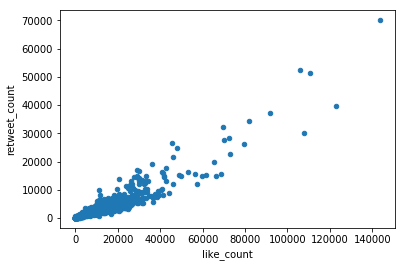

In [70]:
#Comparing like_count to retweet_count
df.plot(x='like_count', y='retweet_count', kind='scatter');

The Average number of likes per tweet: 7580.41


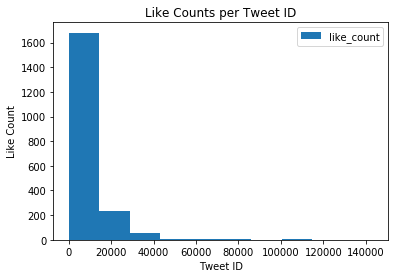

In [71]:
#Comparing like_count to tweet_id
likes_mean = df.like_count.mean()
print('The Average number of likes per tweet: {:.2f}'.format(likes_mean))

df.plot(x='tweet_id', y='like_count', kind='hist')
plt.xlabel('Tweet ID')
plt.ylabel('Like Count')
plt.title('Like Counts per Tweet ID');

The Average number of retweets per tweet: 2211.68


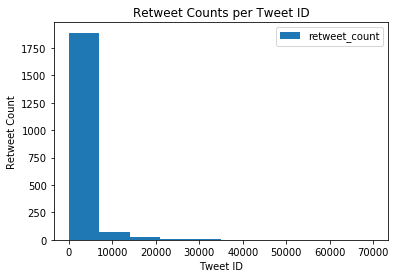

In [72]:
#Comparing retweet_count to tweet_id
retweet_mean = df.retweet_count.mean()
print('The Average number of retweets per tweet: {:.2f}'.format(retweet_mean))

df.plot(x='tweet_id', y='retweet_count', kind='hist')
plt.xlabel('Tweet ID')
plt.ylabel('Retweet Count')
plt.title('Retweet Counts per Tweet ID');

In [73]:
# Breeds with most retweets
breed_retweet = df.groupby('p1')['retweet_count'].sum().sort_values(ascending=False).head(10)
breed_retweet

p1
golden retriever      405220.0
labrador retriever    277957.0
pembroke              225467.0
chihuahua             181401.0
samoyed               140339.0
french bulldog        97321.0 
chow                  94597.0 
pomeranian            86274.0 
cocker spaniel        79787.0 
eskimo dog            78674.0 
Name: retweet_count, dtype: float64

In [74]:
# Breeds with most likes
breed_likes = df.groupby('p1')['like_count'].sum().sort_values(ascending=False).head(10)
breed_likes


p1
golden retriever      1459013.0
labrador retriever    900636.0 
pembroke              857609.0 
chihuahua             591585.0 
samoyed               442952.0 
french bulldog        403883.0 
chow                  349548.0 
pug                   268299.0 
cocker spaniel        265121.0 
pomeranian            261647.0 
Name: like_count, dtype: float64

### Insights:
1. The top 10 most popular dog names reported in the 'We Rate Dogs' dataset are: Charlie, Cooper, Lucy, Oliver, Penny, Tucker, Winston, Sadie, Daisy, and Toby.

2. The top 10 dog breeds that received the most likes and retweets in the 'We Rate Dogs' dataset are: golden retriever, labrador retriever, pembroke, chihuahua, samoyed, french bulldog, chow, pug, cocker spaniel, and pomeranian.

3. Out of 1995 dog ratings analyzed, significantly more users rated dogs at or above 10/10 than users rated dogs below 10/10.

4. The average number of likes per tweet is 7580 while the average number of retweets per tweet is 2212. There also appears to be a positive correlation between tweet likes and retweets. Tweets with higher like counts tend to have higher retweet counts.

5. The tweet receiving the most likes (143,372) and retweets (69,971) is an image of a labrador retriever standing in a pool.

### Visualization

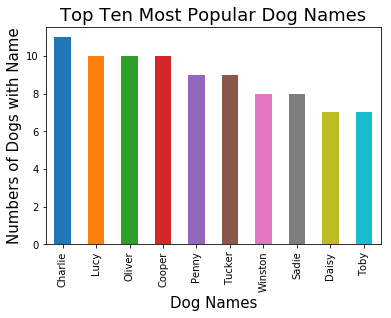

In [75]:
# Top 10 Dog Names
name_rating = df['name'].value_counts().sort_values(ascending=False).head(10)
name_rating.plot(kind='bar')
plt.title('Top Ten Most Popular Dog Names', fontsize=18)
plt.xlabel('Dog Names', fontsize=15)
plt.ylabel('Numbers of Dogs with Name', fontsize=15);


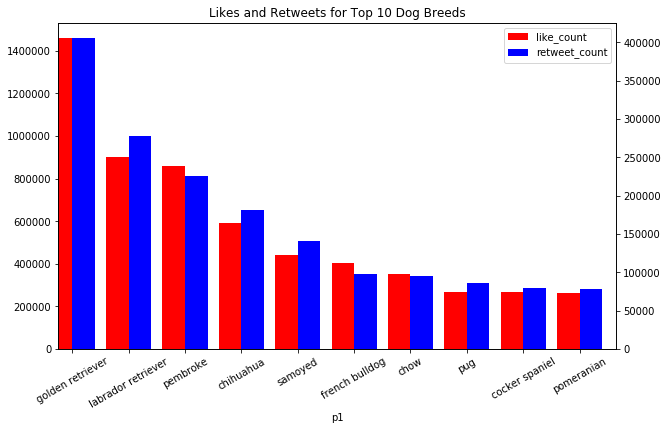

In [76]:
# Plotting breed_likes vs breed_retweets
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

breed_likes.plot(figsize=(10, 6), kind='bar', color='red', ax=ax1, width=0.4, position=1)
breed_retweet.plot(figsize=(10,6), kind='bar', color='blue', ax=ax2, width=0.4, position=0)

ax1.set_ylabel=('Likes')
ax2.set_ylabel=('Retweets')
plt.title('Likes and Retweets for Top 10 Dog Breeds')
ax1.set_xticklabels(breed_likes.index, rotation=30)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=1)
plt.show();


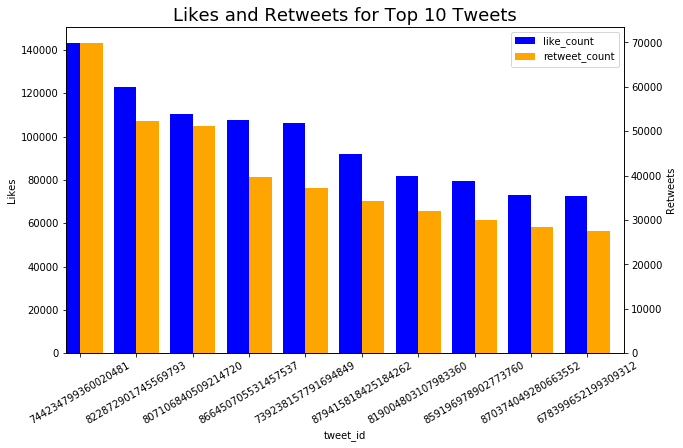

In [77]:
#Comparing like_counts and retweet_counts for top 10 tweet_ids
tweet_likes = df.groupby('tweet_id')['like_count'].sum().sort_values(ascending=False).head(10)
tweet_retweets = df.groupby('tweet_id')['retweet_count'].sum().sort_values(ascending=False).head(10)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

tweet_likes.plot(figsize=(10,6), kind='bar', color='blue', ax=ax1, width=0.4, position=1)
tweet_retweets.plot(figsize=(10,6), kind='bar', color='orange', ax=ax2, width=0.4, position=0)

ax1.set_ylabel('Likes')
ax2.set_ylabel('Retweets')
plt.title('Likes and Retweets for Top 10 Tweets', fontsize=18)
ax1.set_xticklabels(tweet_likes.index, rotation=30)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=1)
plt.show();

In [78]:
#Looking at most liked tweet
most_liked = df.groupby('tweet_id')['like_count'].sum().sort_values(ascending=False).head()
most_liked

tweet_id
744234799360020481    143372.0
822872901745569793    122660.0
807106840509214720    110445.0
866450705531457537    107628.0
739238157791694849    106010.0
Name: like_count, dtype: float64

In [79]:
#Looking at most retweeted tweet
most_retweeted = df.groupby('tweet_id')['retweet_count'].sum().sort_values(ascending=False).head()
most_retweeted

tweet_id
744234799360020481    69971.0
739238157791694849    52363.0
807106840509214720    51171.0
822872901745569793    39581.0
879415818425184262    37101.0
Name: retweet_count, dtype: float64

In [80]:
#Finding the dog image with the most likes and retweets
top_dog_tweet = df[df['tweet_id'] == '744234799360020481']
pd.set_option('max_colwidth', 400)
top_dog_tweet


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count
1222,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,...,ice bear,0.044681,False,whippet,0.018442,True,143372.0,3705.0,1115.0,69971.0


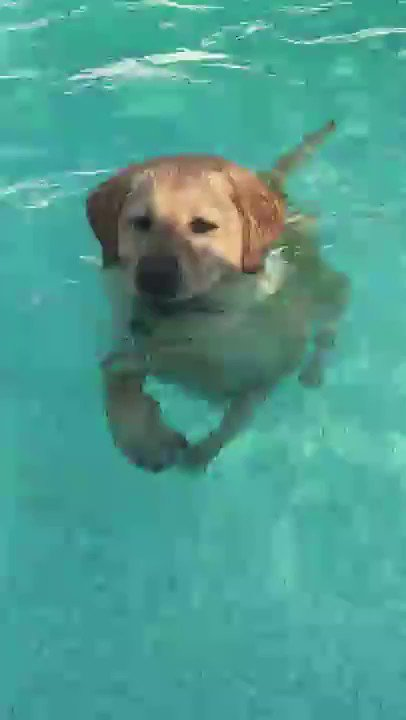

In [82]:
import IPython
url = 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'
IPython.display.Image(url, width = 250)

#### Disclaimer:
It should be noted that these insights were obtained following the data wrangling process and are subject to interpretation as well as error. These results should be interpreted with caution.